In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('data/data.csv')


In [5]:
# COMPARING X AND Y VARIABLES

x = df.drop('math score', axis=1)
y = df['math score']



In [6]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [8]:
# Creating column transformer

num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(

[
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features),
]
)

In [9]:
X = preprocessor.fit_transform(x)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
# separating dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Evaluate function to give all metrics after model training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted)) 
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

# MODEL TRAINING
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # MAKE PREDICTIONS
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # EVALUATE TRAIN AND TEST DATASETS
    model_train_mae, model_train_rmse, model_train_r2, _ = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2, _ = evaluate_model(y_test, y_test_pred)

    # Print model performance
    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))  # Corrected from model_test_mae
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-----------------------------------')
    
    print('Model performance for Testing set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))  # Corrected from model_test_mae
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)


    print('='*28)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 5.3231
-----------------------------------
Model performance for Testing set
- Root Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 5.3940


Ridge
Model performance for Training set
- Root Mean Squared Error: 28.3378
- Mean Absolute Error: 4.2650
- R2 Score: 5.3233
-----------------------------------
Model performance for Testing set
- Root Mean Squared Error: 29.0563
- Mean Absolute Error: 4.2111
- R2 Score: 5.3904


Lasso
Model performance for Training set
- Root Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 6.5938
-----------------------------------
Model performance for Testing set
- Root Mean Squared Error: 42.5064
- Mean Absolute Error: 5.1579
- R2 Score: 6.5197


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 32.5070
- Mean Absolute Error: 4.5070
- R2 Score: 5.7015
----

Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
4,Decision Tree,7.793266
3,K-Neighbors Regressor,7.280179
2,Lasso,6.519695
6,XGBRegressor,6.473307
8,AdaBoost Regressor,6.049313
7,CatBoosting Regressor,6.008632
5,Random Forest Regressor,5.969896
0,Linear Regression,5.393994
1,Ridge,5.390387


In [20]:
# Decision Tree 

dt_model = DecisionTreeRegressor()
dt_model = dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
score = r2_score(y_test, y_pred)
print("Accuracy of the model is %.2f " %score)

Accuracy of the model is 0.75 


Text(0, 0.5, 'predicted')

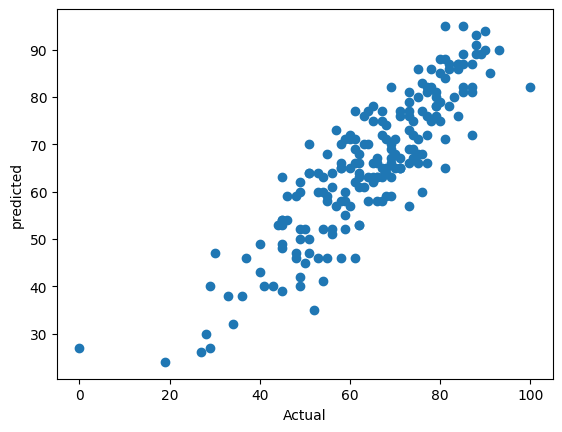

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math score'>

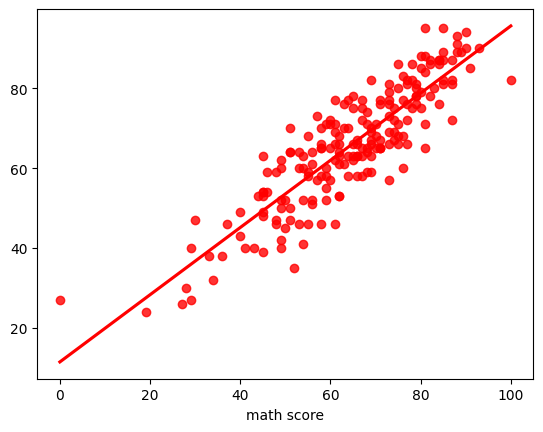

In [23]:
sns.regplot(x=y_test, y=y_pred,ci=None, color='r')

In [24]:
# Difference between actual and predicted values

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual,Predicted,Difference
521,91,85.0,6.0
737,53,60.0,-7.0
740,80,75.0,5.0
660,74,75.0,-1.0
411,84,76.0,8.0
...,...,...,...
408,52,35.0,17.0
332,62,64.0,-2.0
208,74,72.0,2.0
613,65,66.0,-1.0
